In [181]:
import numpy as np
import matplotlib.pyplot as plt
import math

def pgm_viewer(x):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    imag = np.reshape(data,(row,column))
    #y = bytearray(pixel_data_list) # Converting back to bytearray
    plt.figure()
    plt.imshow(imag, cmap="gray")
    plt.colorbar()

In [182]:
def myImageNegative(x):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    for i in range(0,row*column):
        data[i] = 255 - data[i]
        
    imag = np.reshape(data,(row,column))

    plt.figure()
    plt.imshow(imag, cmap="gray")
    plt.colorbar()

Text(0.5, 0, 'Fig 1.2: Negative Image')

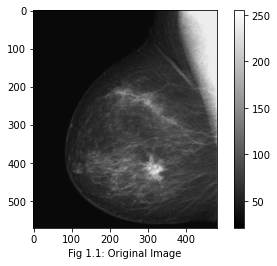

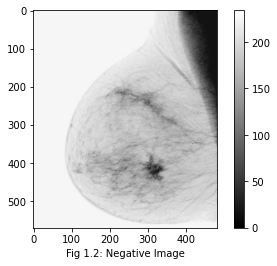

In [183]:
# 3.4

pgm_viewer('Fig0304(a)(breast_digital_Xray).pgm')
plt.xlabel('Fig 1.1: Original Image')
myImageNegative('Fig0304(a)(breast_digital_Xray).pgm')
plt.xlabel('Fig 1.2: Negative Image')

In [184]:
def imageLogTransform(x):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    for i in range(0,row*column):
        data[i] = math.log(1+data[i])
    imag = np.reshape(data,(row,column))
    
    plt.figure()
    plt.imshow(imag, cmap="gray")
    plt.colorbar()

Text(0.5, 0, 'Fig 2.2: Transformed by Logarithm Image')

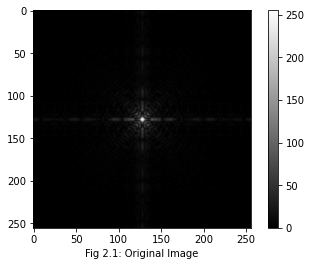

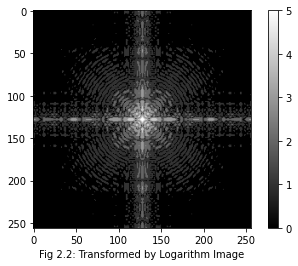

In [185]:
# 3.5
pgm_viewer('Fig0305(a)(DFT_no_log).pgm')
plt.xlabel('Fig 2.1: Original Image')
imageLogTransform('Fig0305(a)(DFT_no_log).pgm')
plt.xlabel('Fig 2.2: Transformed by Logarithm Image')

In [188]:
def imageGammaTransform(x,gamma):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    for i in range(0,row*column):
        data[i] = pow(data[i],gamma)
    imag = np.reshape(data,(row,column))

    plt.figure()
    plt.imshow(imag, cmap="gray")
    plt.colorbar()

Text(0.5, 0, 'Fig 3.4: Gamma Transform gama=0.3')

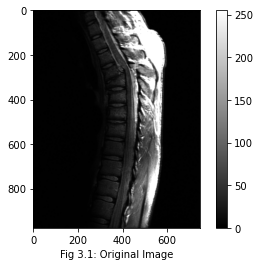

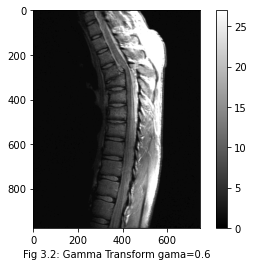

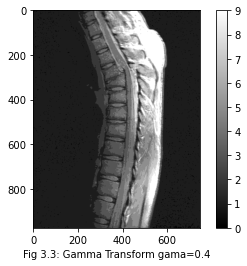

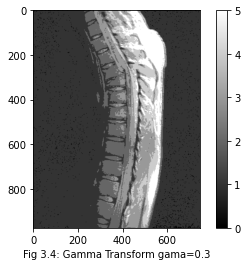

In [189]:
# 3.8
imageGammaTransform('Fig0308(a)(fractured_spine).pgm',1)
plt.xlabel('Fig 3.1: Original Image')
imageGammaTransform('Fig0308(a)(fractured_spine).pgm',0.6)
plt.xlabel('Fig 3.2: Gamma Transform gama=0.6')
imageGammaTransform('Fig0308(a)(fractured_spine).pgm',0.4)
plt.xlabel('Fig 3.3: Gamma Transform gama=0.4')
imageGammaTransform('Fig0308(a)(fractured_spine).pgm',0.3)
plt.xlabel('Fig 3.4: Gamma Transform gama=0.3')

In [190]:
def averageMaskFilter(x,m):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    data = data.reshape((row,column))
    w = np.zeros((row+2,column+2))
    
    for i in range(0,row):    # Creating image frame that consist of 0s
        for j in range(0,column):
            w[i+1][j+1] = data[i][j]
            

    image_edited = np.zeros((row,column))
    for i in range(0,row):
        for j in range(0,column):
            image_edited[i][j] = int(np.mean(w[i:m+i,j:m+j]))
    
    plt.figure()
    plt.imshow(image_edited, cmap="gray")
    plt.colorbar()

Text(0.5, 0, 'Fig 4.6: Square averaging filter m=35')

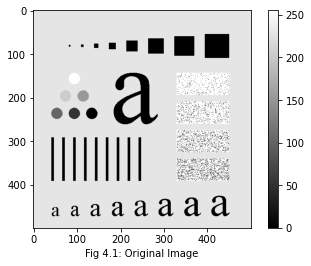

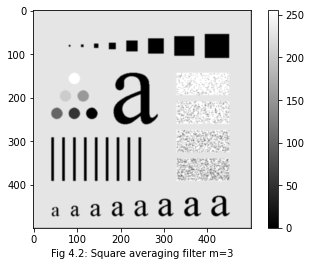

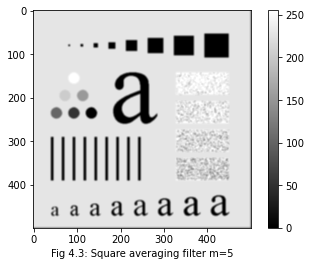

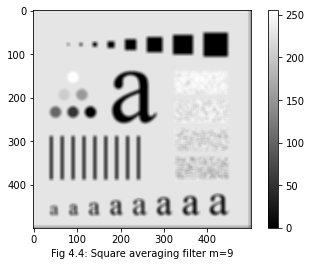

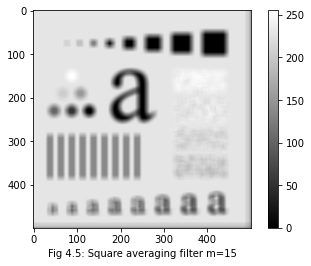

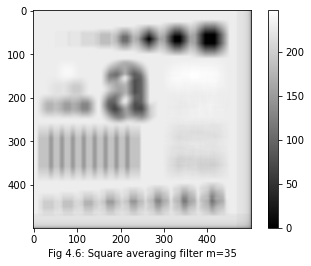

In [191]:
# TASK 3.33
pgm_viewer('Fig0333(a)(test_pattern_blurring_orig).pgm')
plt.xlabel('Fig 4.1: Original Image')
averageMaskFilter('Fig0333(a)(test_pattern_blurring_orig).pgm',3)
plt.xlabel('Fig 4.2: Square averaging filter m=3')
averageMaskFilter('Fig0333(a)(test_pattern_blurring_orig).pgm',5)
plt.xlabel('Fig 4.3: Square averaging filter m=5')
averageMaskFilter('Fig0333(a)(test_pattern_blurring_orig).pgm',9)
plt.xlabel('Fig 4.4: Square averaging filter m=9')
averageMaskFilter('Fig0333(a)(test_pattern_blurring_orig).pgm',15)
plt.xlabel('Fig 4.5: Square averaging filter m=15')
averageMaskFilter('Fig0333(a)(test_pattern_blurring_orig).pgm',35)
plt.xlabel('Fig 4.6: Square averaging filter m=35')

In [192]:
def MedianFilter(x,m):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    data = data.reshape((row,column))
    w = np.zeros((row+2,column+2))
    
    for i in range(0,row):    # Creating image frame that consist of 0s
        for j in range(0,column):
            w[i+1][j+1] = data[i][j]
            
    image_edited = np.zeros((row,column))
    for i in range(0,row):
        for j in range(0,column):
            image_edited[i][j] = int(np.median(w[i:m+i,j:m+j]))
    
    plt.figure()
    plt.imshow(image_edited, cmap="gray")
    plt.colorbar()

Text(0.5, 0, 'Fig 5.3: Noise reduction with 3x3 median filter')

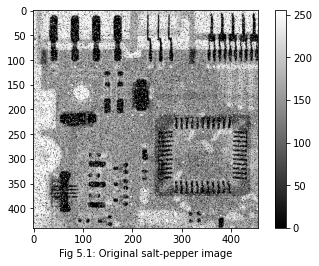

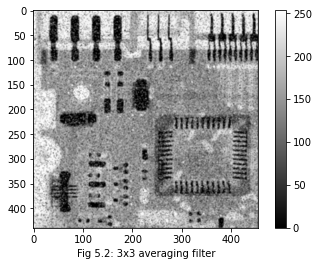

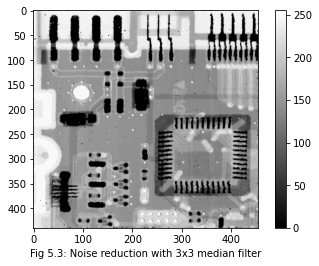

In [193]:
# 3.35
pgm_viewer('Fig0335(a)(ckt_board_saltpep_prob_pt05).pgm') # original image
plt.xlabel('Fig 5.1: Original salt-pepper image')
averageMaskFilter('Fig0335(a)(ckt_board_saltpep_prob_pt05).pgm',3) # 3x3 average mask filter
plt.xlabel('Fig 5.2: 3x3 averaging filter')
MedianFilter('Fig0335(a)(ckt_board_saltpep_prob_pt05).pgm',3) # 3x3 median filter
plt.xlabel('Fig 5.3: Noise reduction with 3x3 median filter')